In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('/content/drive/MyDrive/Obesity or CVD risk Analysis.csv')

In [3]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


# *data cleaning and preprocessing*

In [4]:
data.isnull().sum()

,0
Gender,0
Age,0
Height,0
Weight,0
family_history_with_overweight,0
FAVC,0
FCVC,0
NCP,0
CAEC,0
SMOKE,0


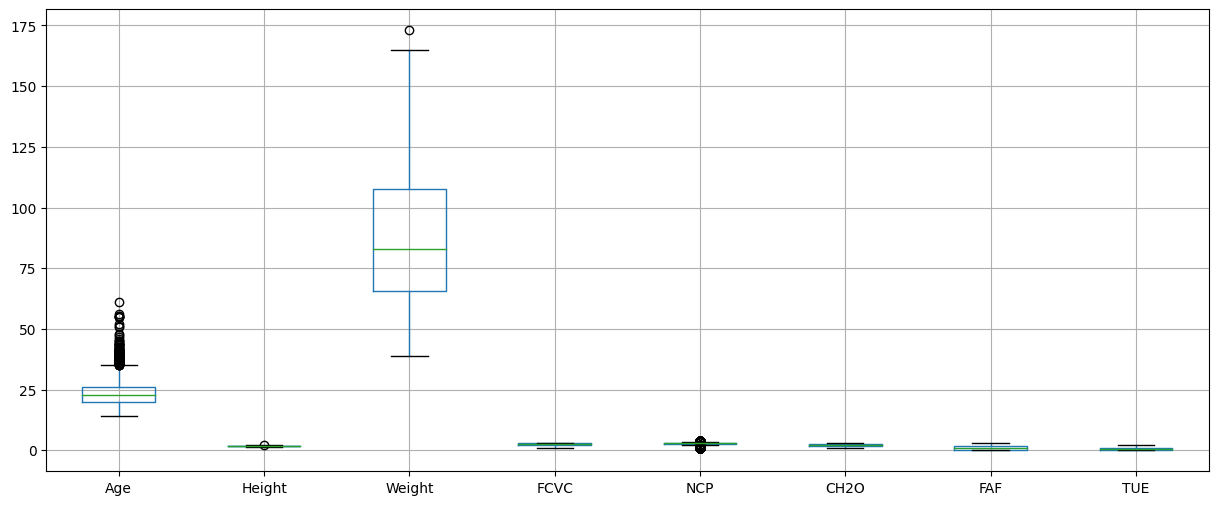

In [5]:
plt.figure(figsize=(15,6))
data.boxplot()
plt.show()

In [6]:
data.skew(numeric_only=True)

,0
Age,1.529100
Height,-0.012855
Weight,0.255410
FCVC,-0.432906
NCP,-1.107097
CH2O,-0.104912
FAF,0.498490
TUE,0.618502


Treating outlier

In [7]:
def ot(data,col):
  Q3=data[col].quantile(0.75)
  Q1=data[col].quantile(0.25)
  IQR=Q3-Q1
  UB=Q3+1.5*IQR
  LB=Q1-1.5*IQR
  upper_ot=data[col]>UB
  lower_ot=data[col]<LB
  data.loc[upper_ot,col]=data[col].median()
  data.loc[lower_ot,col]=data[col].median()
  return data

In [8]:
for i in data.select_dtypes(include=['float64','int64']):
  ot(data,i)

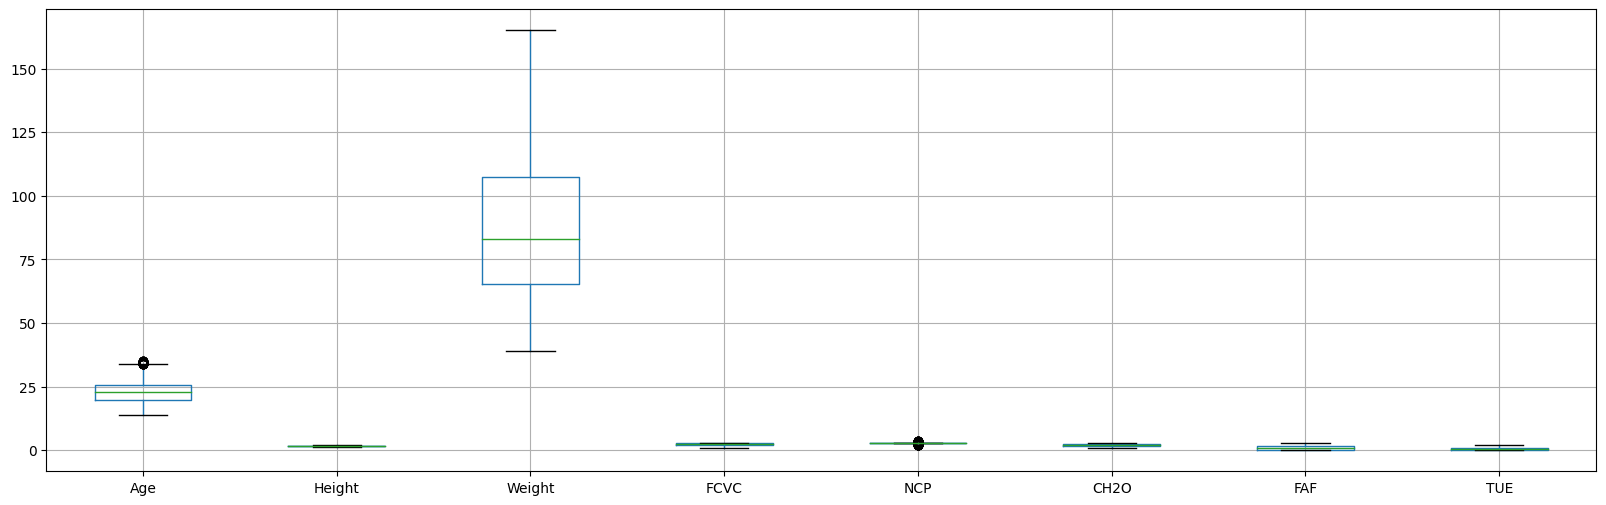

In [9]:
plt.figure(figsize=(20,6))
data.boxplot()
plt.show()

Handinling categorical data

In [10]:
def ctn(data,col):
  LE=LabelEncoder()
  data[col]=LE.fit_transform(data[col])
  return data

In [11]:
for i in data.select_dtypes(include=['object']):
  ctn(data,i)

In [12]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,1
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,1
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,1
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,5
4,1,22.0,1.78,89.8,0,0,2.0,3.0,2,0,2.0,0,0.0,0.0,2,3,6


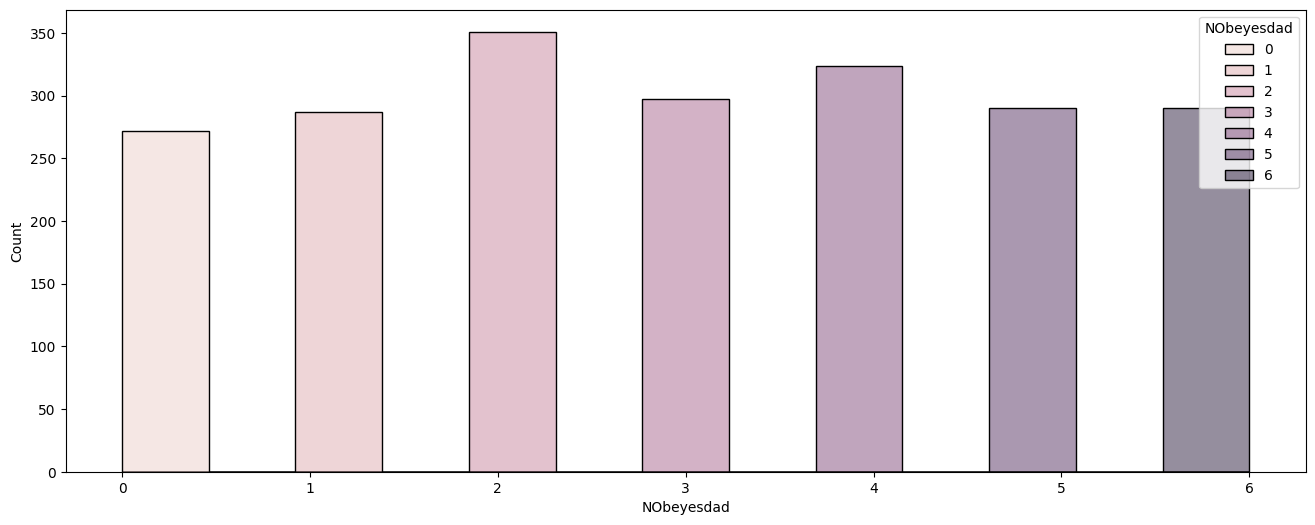

In [13]:
#Distrubution of obesity level
plt.figure(figsize=(16,6))
sns.histplot(data=data,x='NObeyesdad', hue='NObeyesdad')
plt.show()

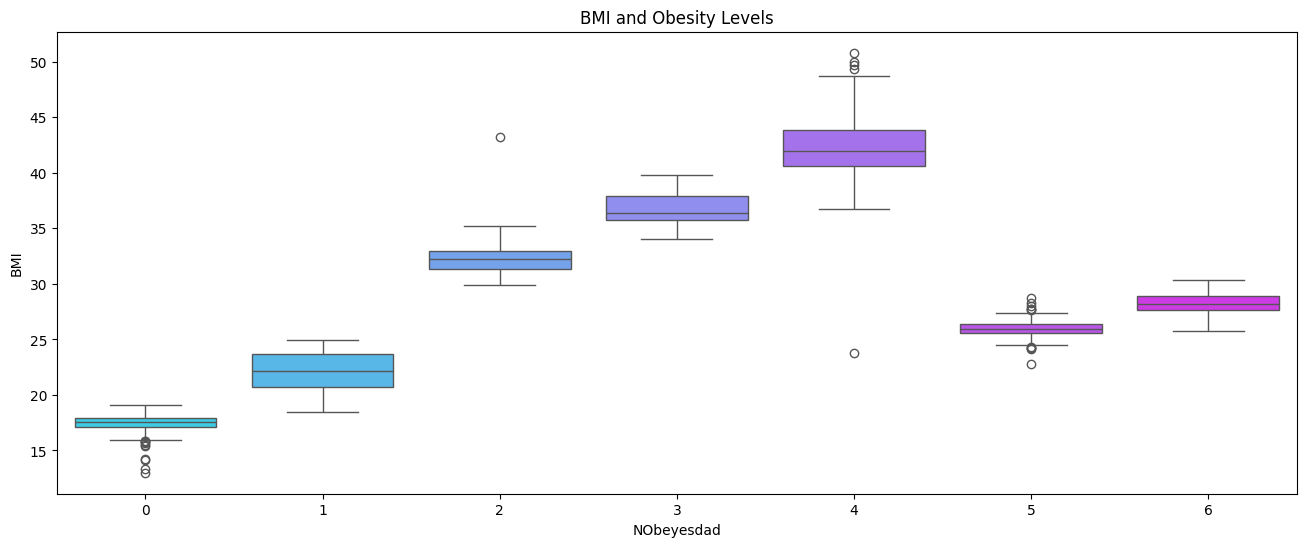

In [14]:
# Calculate BMI (weight in kg / height in m^2)
data['BMI'] = data['Weight'] / (data['Height'] ** 2)

# Relation of BMI with obesity levels
plt.figure(figsize=(16,6))
sns.boxplot(x='NObeyesdad', y='BMI', data=data, palette='cool')
plt.title('BMI and Obesity Levels')
plt.show()


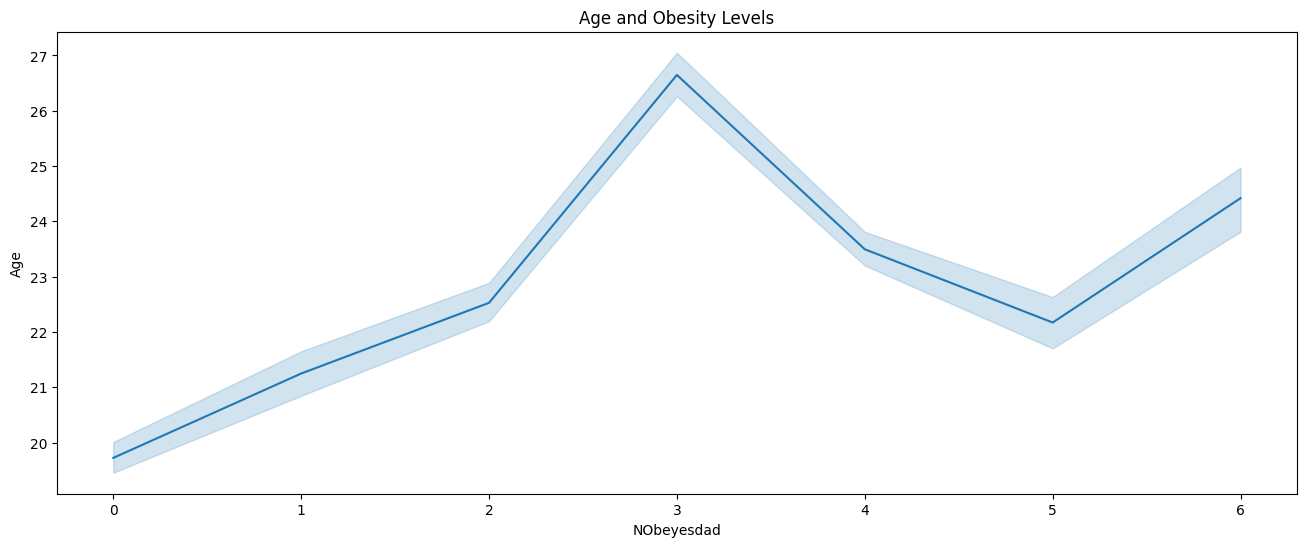

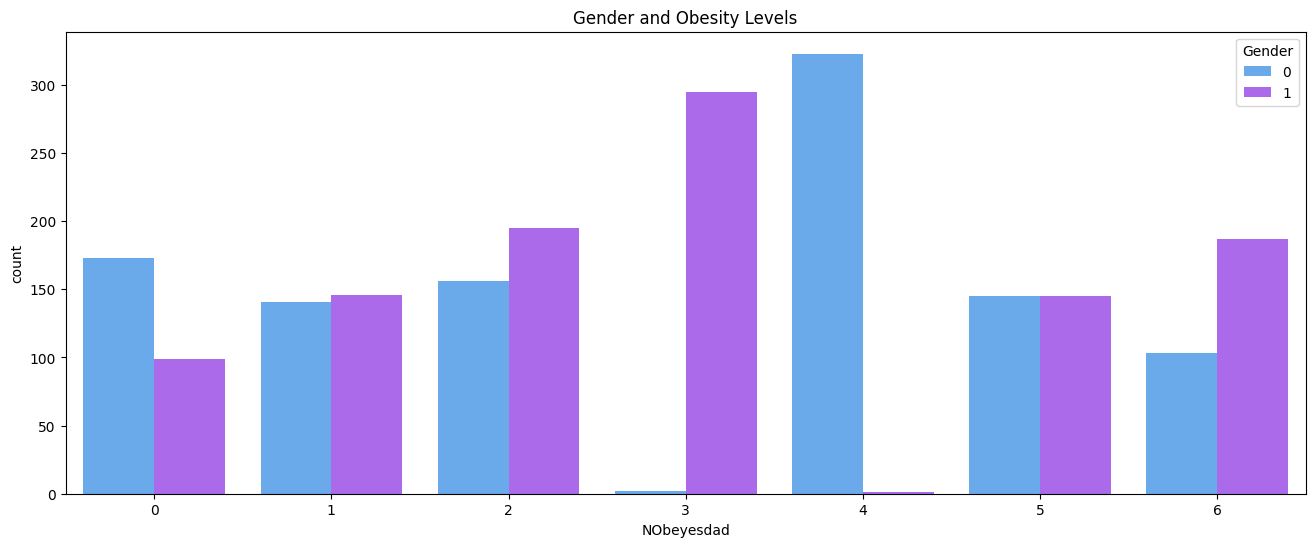

In [15]:
# Age trends in obesity distribution
plt.figure(figsize=(16, 6))
sns.lineplot(data=data,x='NObeyesdad', y='Age', palette='cool')
plt.title('Age and Obesity Levels')
plt.show()

# Gender trends in obesity distribution
plt.figure(figsize=(16, 6))
sns.countplot(data=data,x='NObeyesdad', hue='Gender',palette='cool')
plt.title('Gender and Obesity Levels')
plt.show()


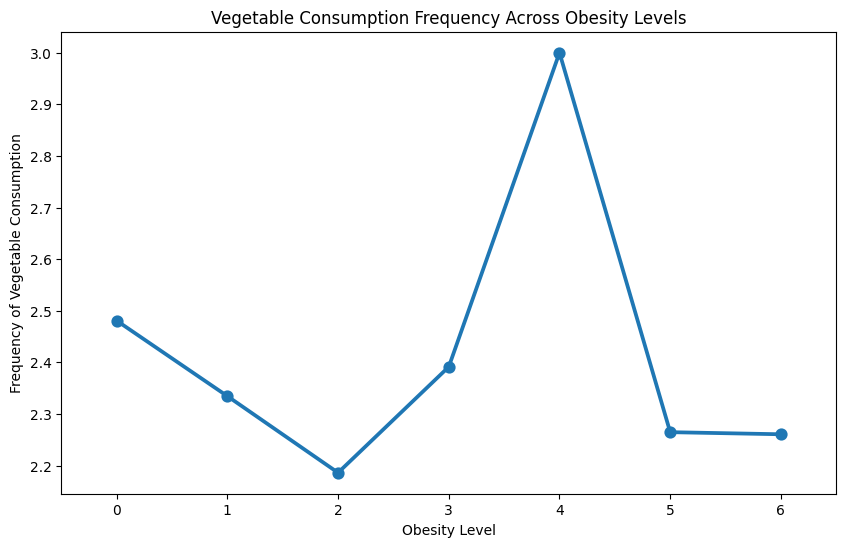

In [16]:
# Impact of vegetable consumption
plt.figure(figsize=(10, 6))
sns.pointplot(x='NObeyesdad', y='FCVC', data=data,errorbar=None)
plt.title('Vegetable Consumption Frequency Across Obesity Levels')
plt.xlabel('Obesity Level')
plt.ylabel('Frequency of Vegetable Consumption')
plt.show()

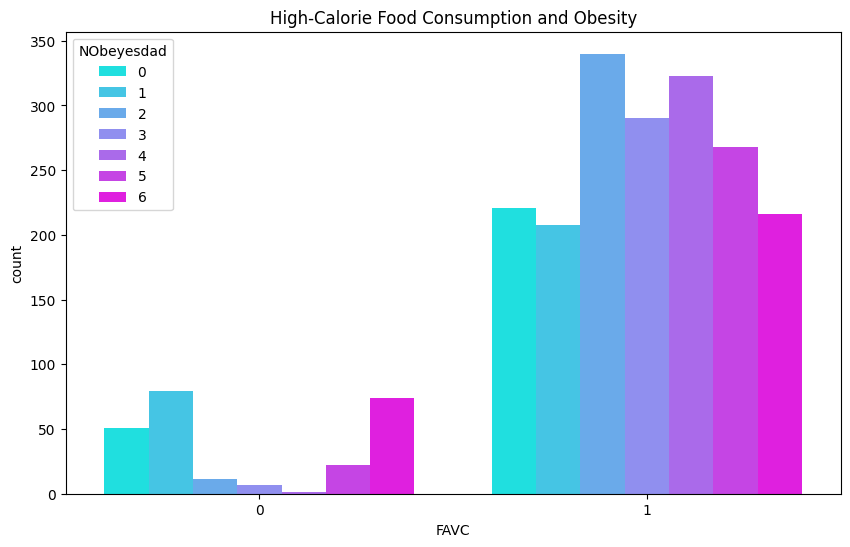

In [17]:
#High-Calorie Food Consumption and Obesity
plt.figure(figsize=(10,6))
sns.countplot(x='FAVC', hue='NObeyesdad', data=data, palette='cool')
plt.title('High-Calorie Food Consumption and Obesity')
plt.show()

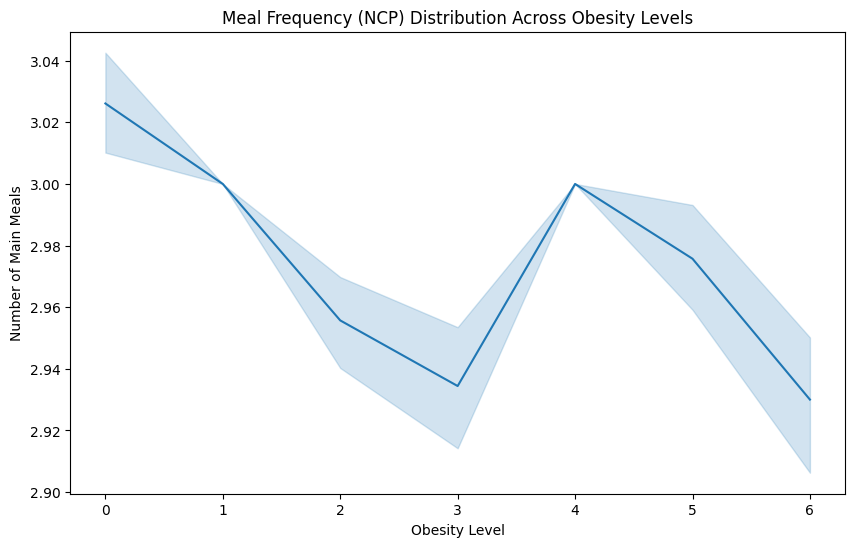

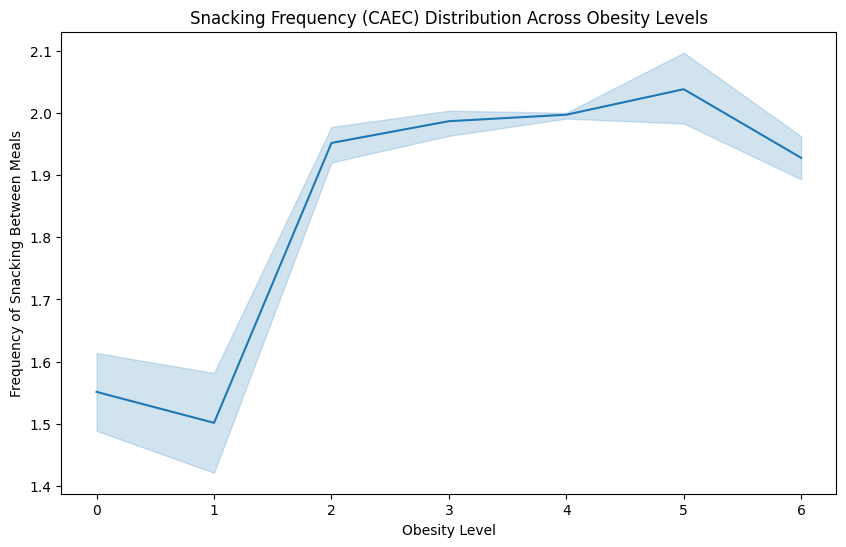

                 NCP      CAEC  NObeyesdad
NCP         1.000000 -0.058008   -0.136993
CAEC       -0.058008  1.000000    0.327295
NObeyesdad -0.136993  0.327295    1.000000


In [18]:
# What role does meal frequency (NCP) and snacking (CAEC) play in determining obesity levels?

# Analyze the relationship between NCP (meal frequency) and obesity levels
plt.figure(figsize=(10, 6))
sns.lineplot( data=data,x='NObeyesdad', y='NCP')
plt.title('Meal Frequency (NCP) Distribution Across Obesity Levels')
plt.xlabel('Obesity Level')
plt.ylabel('Number of Main Meals')
plt.show()

# Analyze the relationship between CAEC (snacking frequency) and obesity levels
plt.figure(figsize=(10, 6))
sns.lineplot( data=data,x='NObeyesdad', y='CAEC')
plt.title('Snacking Frequency (CAEC) Distribution Across Obesity Levels')
plt.xlabel('Obesity Level')
plt.ylabel('Frequency of Snacking Between Meals')
plt.show()

# correlation between NCP, CAEC, and NObeyesdad
correlation_matrix = data[['NCP', 'CAEC', 'NObeyesdad']].corr()
print(correlation_matrix)


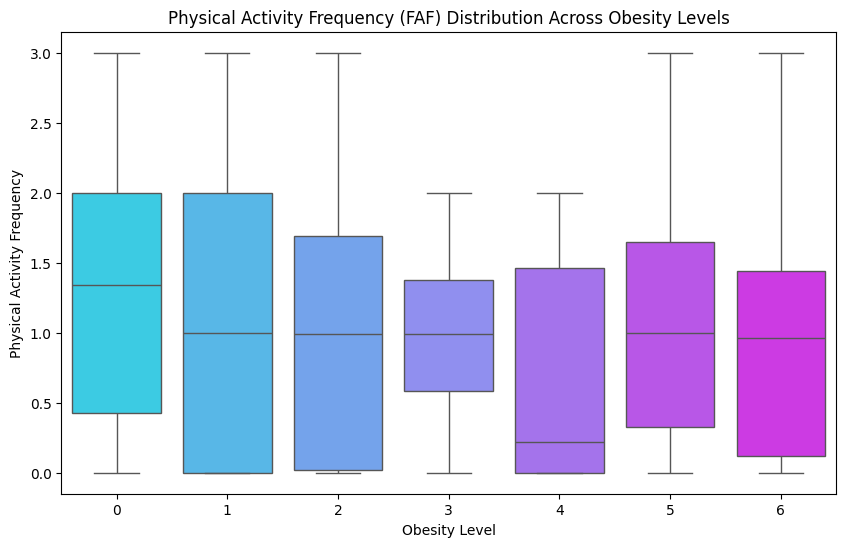

Correlation between Physical Activity Frequency (FAF) and Obesity Levels: -0.12956430772685076


In [19]:
# Analyze the relationship between FAF (physical activity frequency) and obesity levels
plt.figure(figsize=(10, 6))
sns.boxplot(data=data,x='NObeyesdad', y='FAF',palette='cool')
plt.title('Physical Activity Frequency (FAF) Distribution Across Obesity Levels')
plt.xlabel('Obesity Level')
plt.ylabel('Physical Activity Frequency')
plt.show()

# Calculate the correlation between FAF and NObeyesdad
correlation = data['FAF'].corr(data['NObeyesdad'])
print(f"Correlation between Physical Activity Frequency (FAF) and Obesity Levels: {correlation}")


In [20]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,1,24.386526
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,1,24.238227
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,1,23.765432
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,5,26.851852
4,1,22.0,1.78,89.8,0,0,2.0,3.0,2,0,2.0,0,0.0,0.0,2,3,6,28.342381


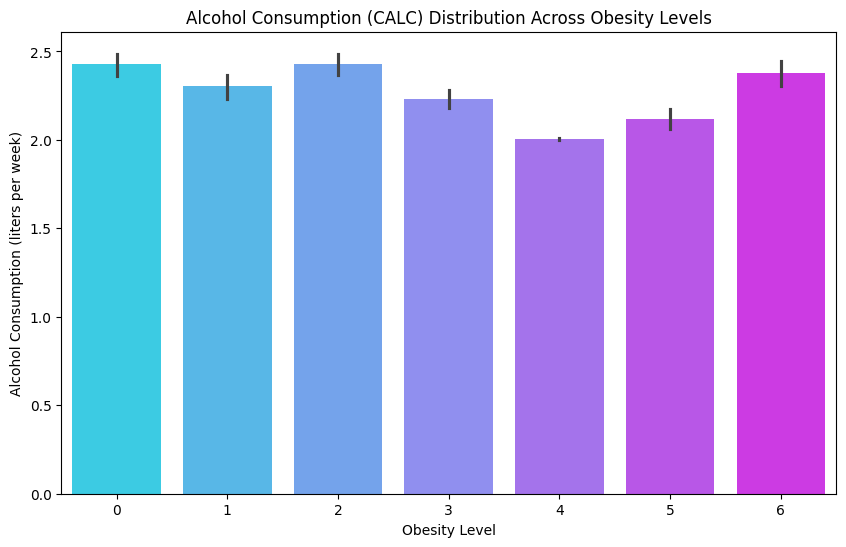

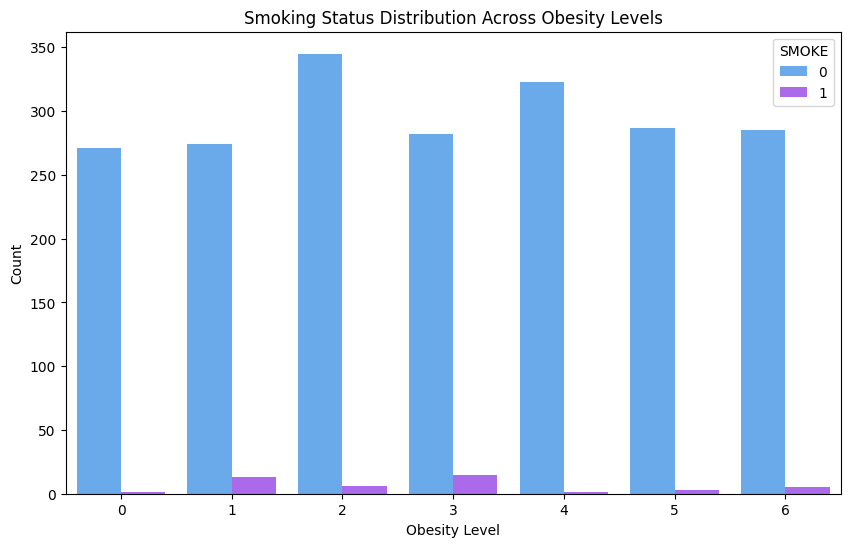



                CALC     SMOKE  NObeyesdad
CALC        1.000000 -0.082471   -0.134632
SMOKE      -0.082471  1.000000   -0.023256
NObeyesdad -0.134632 -0.023256    1.000000




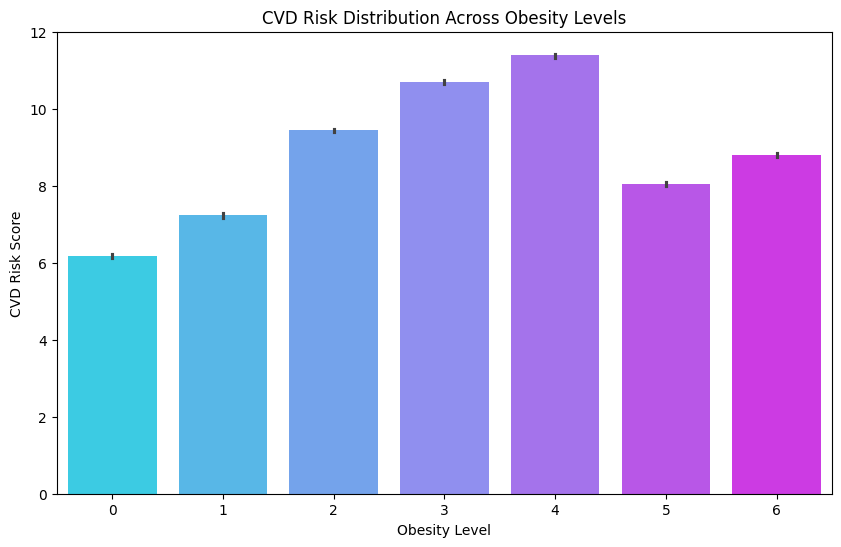

In [21]:
#How does alcohol consumption (CALC) and smoking (SMOKE) influence obesity and potential CVD(cardiovascular dieses) risk?

# Analyze the relationship between alcohol consumption (CALC) and obesity levels
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='NObeyesdad', y='CALC',palette='cool')
plt.title('Alcohol Consumption (CALC) Distribution Across Obesity Levels')
plt.xlabel('Obesity Level')
plt.ylabel('Alcohol Consumption (liters per week)')
plt.show()

# Analyze the relationship between smoking (SMOKE) and obesity levels
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='NObeyesdad', hue='SMOKE',palette='cool')
plt.title('Smoking Status Distribution Across Obesity Levels')
plt.xlabel('Obesity Level')
plt.ylabel('Count')
plt.show()

print('\n')
# Correlation between alcohol consumption, smoking, and obesity levels
correlation_matrix = data[['CALC', 'SMOKE', 'NObeyesdad']].corr()
print(correlation_matrix)

print('\n')

# potential CVD risk by analyzing the relationship between alcohol consumption, smoking, and other relevant factors like age, BMI, and physical activity level.

#'CVD_Risk' based on a combination of factors
data['CVD_Risk'] = data['Age'] * 0.1 + data['BMI'] * 0.2 + data['CALC'] * 0.3 + data['SMOKE'] * 0.4

#Analyze the relationship between CVD_Risk and obesity levels
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='NObeyesdad', y='CVD_Risk',palette='cool')
plt.title('CVD Risk Distribution Across Obesity Levels')
plt.xlabel('Obesity Level')
plt.ylabel('CVD Risk Score')
plt.show()

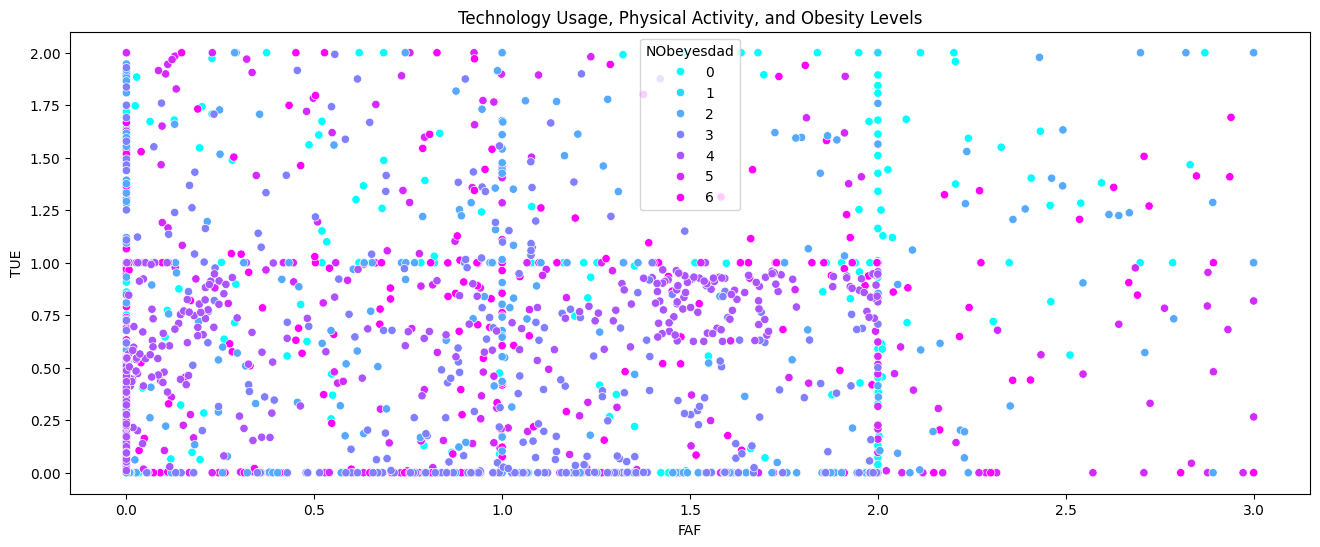

In [22]:
#Technology Usage, Physical Activity, and Obesity Levels
plt.figure(figsize=(16, 6))
sns.scatterplot(data=data, x='FAF', y='TUE',hue='NObeyesdad',palette='cool')
plt.title('Technology Usage, Physical Activity, and Obesity Levels')
plt.show()


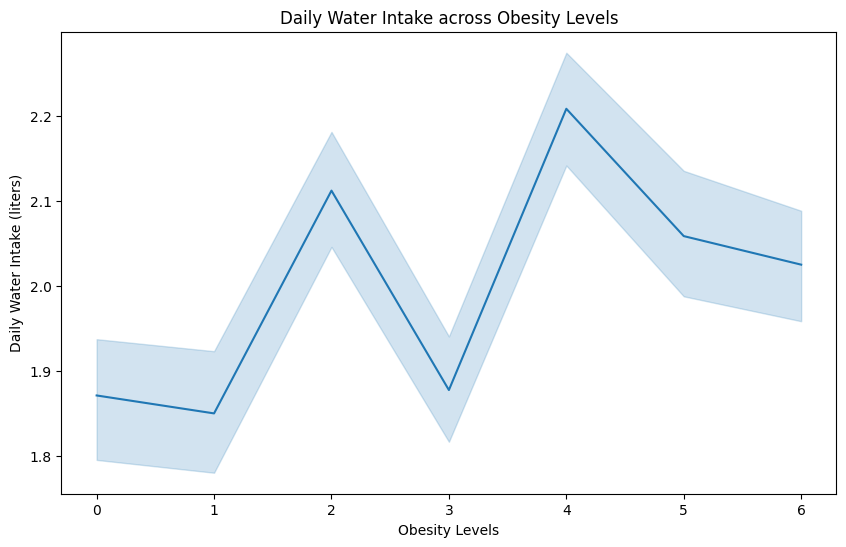

In [23]:
# Water consumption and obesity levels
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='NObeyesdad', y='CH2O')
plt.title('Daily Water Intake across Obesity Levels')
plt.xlabel('Obesity Levels')
plt.ylabel('Daily Water Intake (liters)')
plt.show()

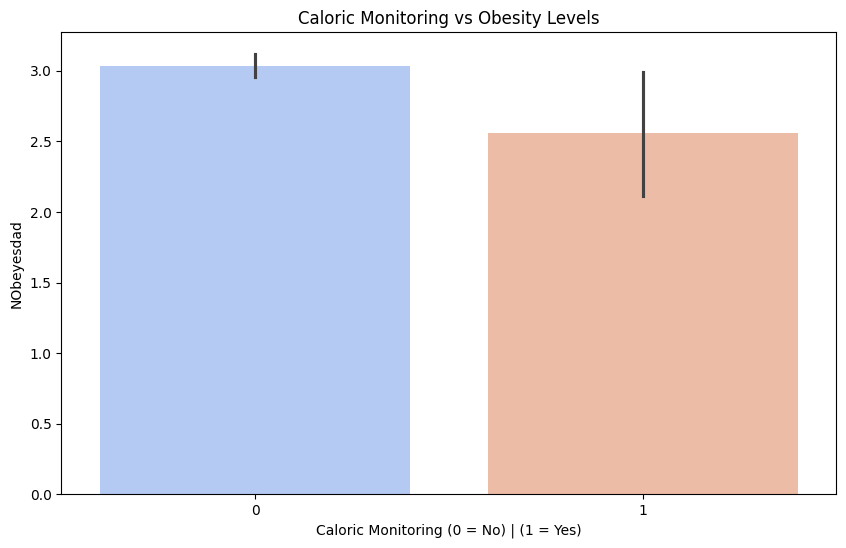

In [24]:
plt.figure(figsize=(10, 6))
sns.barplot(data=data,x='SCC',y='NObeyesdad',palette='coolwarm')
plt.title('Caloric Monitoring vs Obesity Levels')
plt.xlabel('Caloric Monitoring (0 = No) | (1 = Yes)')
plt.show()

In [25]:
# Calculate the count of each obesity level for SCC and non-SCC groups
obesity_counts = data.groupby(['SCC', 'NObeyesdad']).size().unstack().fillna(0)
obesity_counts

NObeyesdad,0,1,2,3,4,5,6
SCC,,,,,,,
0,250.0,257.0,349.0,296.0,324.0,253.0,286.0
1,22.0,30.0,2.0,1.0,0.0,37.0,4.0


<Figure size 1000x800 with 0 Axes>

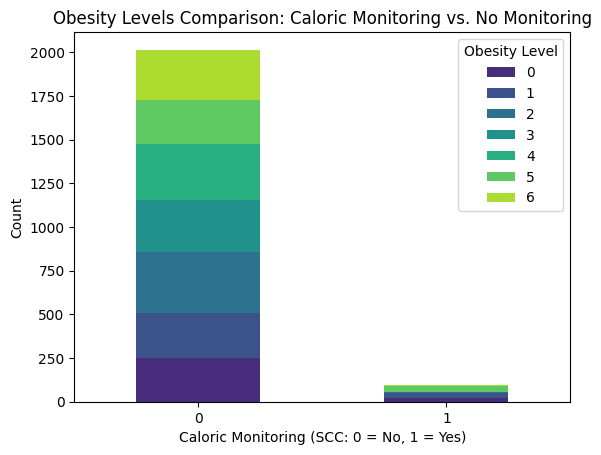

In [26]:
# Create a bar plot to compare the count of obesity levels for individuals who monitor calorie intake vs. those who do not
plt.figure(figsize=(10, 8))
obesity_counts.plot(kind='bar', stacked=True, color=sns.color_palette('viridis', len(obesity_counts.columns)))
plt.title('Obesity Levels Comparison: Caloric Monitoring vs. No Monitoring')
plt.xlabel('Caloric Monitoring (SCC: 0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Obesity Level')
plt.show()

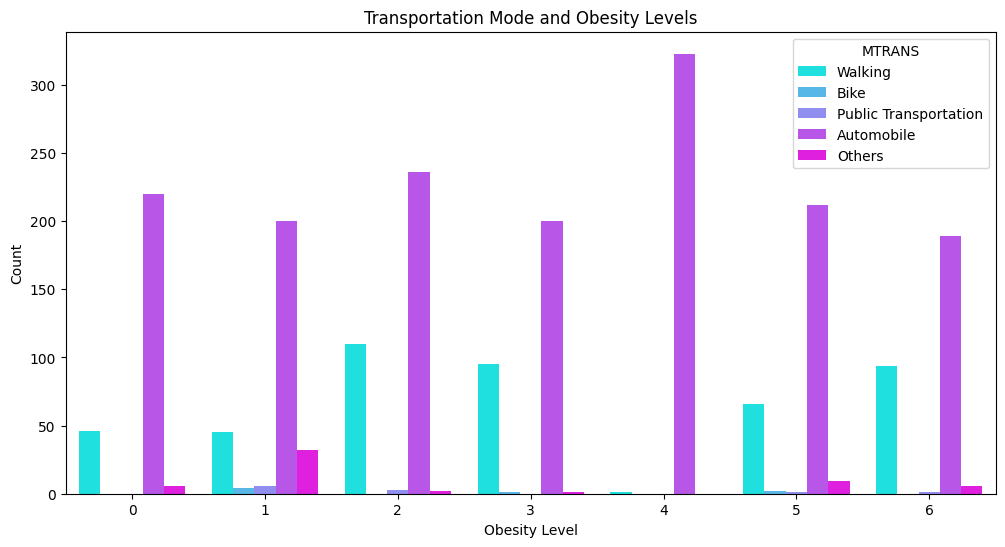



MTRANS        0  1  2    3   4
NObeyesdad                    
0            46  0  0  220   6
1            45  4  6  200  32
2           110  0  3  236   2
3            95  1  0  200   1
4             1  0  0  323   0
5            66  2  1  212   9
6            94  0  1  189   6


MTRANS              0          1          2          3          4
NObeyesdad                                                       
0           10.065646   0.000000   0.000000  13.924051  10.714286
1            9.846827  57.142857  54.545455  12.658228  57.142857
2           24.070022   0.000000  27.272727  14.936709   3.571429
3           20.787746  14.285714   0.000000  12.658228   1.785714
4            0.218818   0.000000   0.000000  20.443038   0.000000
5           14.442013  28.571429   9.090909  13.417722  16.071429
6           20.568928   0.000000   9.090909  11.962025  10.714286


In [27]:
# Analyze the relationship between transportation mode (MTRANS) and obesity levels
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='NObeyesdad', hue='MTRANS',palette='cool')
plt.title('Transportation Mode and Obesity Levels')
plt.xlabel('Obesity Level')
plt.ylabel('Count')
plt.legend(title='MTRANS', labels=['Walking','Bike','Public Transportation','Automobile','Others'])
plt.show()

print('\n')

# Create a cross-tabulation of obesity levels and transportation modes
transportation_obesity_counts = pd.crosstab(data['NObeyesdad'], data['MTRANS'])
print(transportation_obesity_counts)

print('\n')

# Calculate the percentage of individuals with each obesity level for each transportation mode
transportation_obesity_percentages = transportation_obesity_counts.div(transportation_obesity_counts.sum(axis=0), axis=1) * 100
print(transportation_obesity_percentages)


#'Walking','Bike','Public Transportation','Automobile','Others



In [28]:
transportation_obesity_percentages

#'Walking','Bike','Public Transportation','Automobile','Others

MTRANS,0,1,2,3,4
NObeyesdad,,,,,
0,10.065646,0.000000,0.000000,13.924051,10.714286
1,9.846827,57.142857,54.545455,12.658228,57.142857
2,24.070022,0.000000,27.272727,14.936709,3.571429
3,20.787746,14.285714,0.000000,12.658228,1.785714
4,0.218818,0.000000,0.000000,20.443038,0.000000
5,14.442013,28.571429,9.090909,13.417722,16.071429
6,20.568928,0.000000,9.090909,11.962025,10.714286


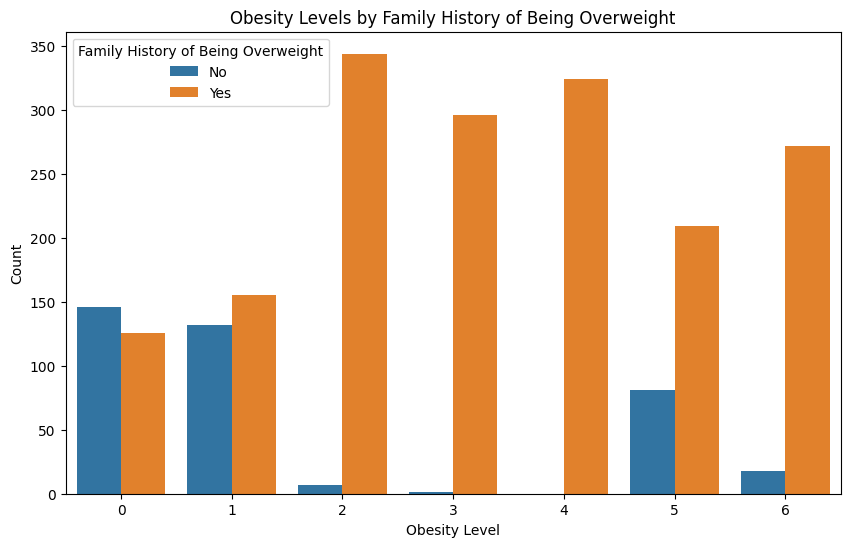

In [29]:
# Count Plot for Family History vs Obesity Levels
plt.figure(figsize=(10, 6))
sns.countplot(x='NObeyesdad', hue='family_history_with_overweight', data=data)
plt.title('Obesity Levels by Family History of Being Overweight')
plt.xlabel('Obesity Level')
plt.ylabel('Count')
plt.legend(title='Family History of Being Overweight', labels=['No', 'Yes'])
plt.show()

In [30]:
# Group the data by family history and calculate the mean for dietary and lifestyle habits
dietary_lifestyle_habits = data.groupby('family_history_with_overweight')[['FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'FAF']].mean()
dietary_lifestyle_habits

,FAVC,FCVC,NCP,CAEC,SMOKE,SCC,CALC,FAF
family_history_with_overweight,,,,,,,,
0,0.742857,2.373413,2.995763,1.690909,0.015584,0.127273,2.228571,1.112341
1,0.915411,2.429221,2.968930,1.896871,0.022016,0.027231,2.277520,0.987536


<Figure size 1400x800 with 0 Axes>

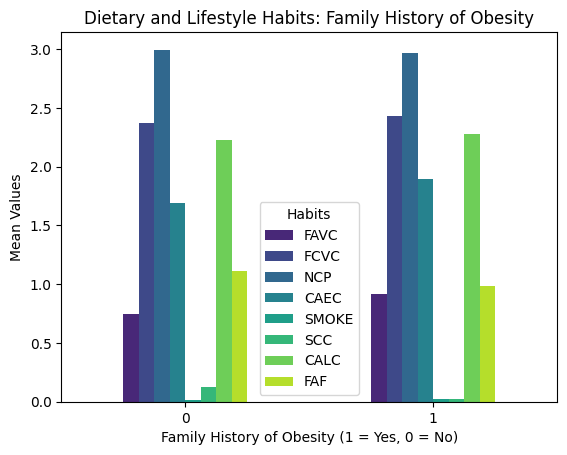

In [31]:
#  compare dietary and lifestyle habits for individuals with and without family history of obesity
plt.figure(figsize=(14, 8))
dietary_lifestyle_habits.plot(kind='bar', color=sns.color_palette('viridis', len(dietary_lifestyle_habits.columns)))
plt.title('Dietary and Lifestyle Habits: Family History of Obesity')
plt.xlabel('Family History of Obesity (1 = Yes, 0 = No)')
plt.ylabel('Mean Values')
plt.xticks(rotation=0)
plt.legend(title='Habits')
plt.show()


### **Lifestyle Recommendations to Reduce Obesity and CVD Risk**:

Based on the analysis of obesity levels, physical activity, dietary habits, and lifestyle factors, here are recommendations to reduce obesity and cardiovascular disease (CVD) risks:

- **Exercise**: Aim for 150 minutes/week of moderate physical activity.
- **Limit Sedentary Behavior**: Reduce screen time and take regular activity breaks.
- **Improve Diet**: Eat more vegetables, track calorie intake, and avoid high-calorie foods.
- **Regular Meals**: Maintain a consistent meal schedule and avoid unhealthy snacks.
- **Stay Hydrated**: Drink enough water daily.
- **Limit Alcohol & Quit Smoking**: Reduce alcohol intake and quit smoking for better health.
- **Use Active Transportation**: Walk or cycle instead of driving to increase daily physical activity.
- **Family Support**: Encourage family support for healthy habits, especially if there's a family history of obesity.

By making these changes, individuals can reduce their risk of obesity and associated CVD, leading to improved overall health.





---






### **Diet and Physical Activity Improvement Strategies**:

**1. Eat More Vegetables**  
- Fill half of your plate with vegetables or fruits at every meal. Aim for 5 servings a day.

**2. Reduce Junk Food**  
- Avoid processed, high-calorie foods. Choose whole grains, lean proteins, and healthy fats.

**3. Stick to Regular Meals**  
- Eat 3 balanced meals daily. Snack on fruits, nuts, or yogurt if needed.

**4. Track Your Caloric Intake**  
- Use apps or a food diary to monitor calorie intake for better portion control.

**5. Stay Hydrated**  
- Drink 2-3 liters of water daily. Limit sugary drinks like sodas.

**6. Exercise Regularly**  
- Aim for 150 minutes of moderate activity per week, such as walking or cycling.

**7. Increase Daily Activity**  
- Take stairs, walk more, or park further from your destination to stay active.

**8. Limit Screen Time**  
- Take breaks from sitting every 20 minutes to stretch or move around.

**9. Choose Active Transportation**  
- Walk or cycle instead of driving whenever possible.

---

